<a href="https://colab.research.google.com/github/Akrom1996/LSTM/blob/main/LSTM_ENERGY_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting  from google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READ CSV FILE FROM GOOGLE DRIVE
drive_path = "/content/drive/MyDrive/photoVoltaic LSTM/dataset.csv"
df = pd.read_csv(drive_path, parse_dates=['Timestamp'],
  index_col="Timestamp")
print(df.head())

df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

                    site1 site2 site3 site4  ... site47 site48 site49 site50
Timestamp                                    ...                            
2020-01-01 00:13:44     -   NaN     -     -  ...      -      -      -      -
2020-01-01 00:29:03     -   NaN     -     -  ...      -      -      -      -
2020-01-01 00:44:22     -   NaN     -     -  ...      -      -      -      -
2020-01-01 00:59:41     -   NaN     -     -  ...      -      -      -      -
2020-01-01 01:13:43     -   NaN     -     -  ...      -      -      -      -

[5 rows x 50 columns]


In [3]:
# FILLING EXISTING DATA WITH 0
df = df.replace('-', np.nan)
new_data = df.fillna(0)

In [4]:
# CHANGING COLUMN NAMES
new_data['site1']=new_data['site1'].astype(str).astype(float)
new_data['site2']=new_data['site2'].astype(str).astype(float)
new_data['site3']=new_data['site3'].astype(str).astype(float)
new_data['site4']=new_data['site4'].astype(str).astype(float)
new_data['site5']=new_data['site5'].astype(str).astype(float)
new_data['site6']=new_data['site6'].astype(str).astype(float)
new_data['site7']=new_data['site7'].astype(str).astype(float)
new_data['site8']=new_data['site8'].astype(str).astype(float)
new_data['site9']=new_data['site9'].astype(str).astype(float)
new_data['site10']=new_data['site10'].astype(str).astype(float)
new_data['site11']=new_data['site11'].astype(str).astype(float)
new_data['site12']=new_data['site12'].astype(str).astype(float)
new_data['site13']=new_data['site13'].astype(str).astype(float)
new_data['site14']=new_data['site14'].astype(str).astype(float)
new_data['site15']=new_data['site15'].astype(str).astype(float)
new_data['site16']=new_data['site16'].astype(str).astype(float)
new_data['site17']=new_data['site17'].astype(str).astype(float)
new_data['site18']=new_data['site18'].astype(str).astype(float)
new_data['site19']=new_data['site19'].astype(str).astype(float)
new_data['site20']=new_data['site20'].astype(str).astype(float)
new_data['site21']=new_data['site21'].astype(str).astype(float)
new_data['site22']=new_data['site22'].astype(str).astype(float)
new_data['site23']=new_data['site23'].astype(str).astype(float)
new_data['site24']=new_data['site24'].astype(str).astype(float)
new_data['site25']=new_data['site25'].astype(str).astype(float)
new_data['site26']=new_data['site26'].astype(str).astype(float)
new_data['site27']=new_data['site27'].astype(str).astype(float)
new_data['site28']=new_data['site28'].astype(str).astype(float)
new_data['site29']=new_data['site29'].astype(str).astype(float)
new_data['site30']=new_data['site30'].astype(str).astype(float)
new_data['site31']=new_data['site31'].astype(str).astype(float)
new_data['site32']=new_data['site32'].astype(str).astype(float)
new_data['site33']=new_data['site33'].astype(str).astype(float)
new_data['site34']=new_data['site34'].astype(str).astype(float)
new_data['site35']=new_data['site35'].astype(str).astype(float)
new_data['site36']=new_data['site36'].astype(str).astype(float)
new_data['site37']=new_data['site37'].astype(str).astype(float)
new_data['site38']=new_data['site38'].astype(str).astype(float)
new_data['site39']=new_data['site39'].astype(str).astype(float)
new_data['site40']=new_data['site40'].astype(str).astype(float)
new_data['site41']=new_data['site41'].astype(str).astype(float)
new_data['site42']=new_data['site42'].astype(str).astype(float)
new_data['site43']=new_data['site43'].astype(str).astype(float)
new_data['site44']=new_data['site44'].astype(str).astype(float)
new_data['site45']=new_data['site45'].astype(str).astype(float)
new_data['site46']=new_data['site46'].astype(str).astype(float)
new_data['site47']=new_data['site47'].astype(str).astype(float)
new_data['site48']=new_data['site48'].astype(str).astype(float)
new_data['site49']=new_data['site49'].astype(str).astype(float)
new_data['site50']=new_data['site50'].astype(str).astype(float)

In [5]:
# SEPERATE DATA FROM 1-3 MONTHS
data = new_data.iloc[:5680,2:8]

# DEFINING TRAIN AND TEST SIZES
train_size = int(len(data) * 0.9)
train_data = data.iloc[:train_size,:]
test_data  = data.iloc[train_size:,:]

X_train, y_train = train_data.iloc[:,:5],train_data.iloc[:,5]
X_test, y_test = test_data.iloc[:,:5],test_data.iloc[:,5]

# USE MINMAX SCALER
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

#SCALING TRAIN DATA
scaled_X_train = scaler.fit_transform(X_train)
scaled_y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

scaled_X_train = scaled_X_train.reshape(len(scaled_X_train),1, 5)
scaled_y_train = scaled_y_train.reshape(-1,1)

#SCALING TEST DATA
scaled_X_test = scaler.fit_transform(X_test)
scaled_y_test = scaler.fit_transform(y_test.values.reshape(-1,1))

scaled_X_test = scaled_X_test.reshape(len(scaled_X_test),1, 5)
scaled_y_test = scaled_y_test.reshape(-1,1)


for i in range(30,60):
	print('%s => %s' % (scaled_X_train[i], scaled_y_train[i]))
  
print(X_train.shape, y_train.shape)

[[0.07598221 0.07204515 0.07031756 0.07091737 0.08713137]] => [0.08146706]
[[0.09266123 0.07038513 0.08781594 0.06864021 0.13907507]] => [0.13567024]
[[0.13973314 0.06938911 0.117628   0.19030579 0.20911528]] => [0.20253165]
[[0.15715345 0.28718459 0.20998056 0.25959662 0.28418231]] => [0.27198961]
[[0.2005189  0.36088977 0.30719378 0.3308393  0.35187668]] => [0.34209672]
[[0.31912528 0.42430279 0.37167855 0.40696161 0.41621984]] => [0.40830899]
[[0.39065975 0.48605578 0.42093325 0.45966168 0.47788204]] => [0.47711782]
[[0.46590067 0.53851262 0.47666883 0.51594014 0.53418231]] => [0.53683869]
[[0.53595256 0.58598938 0.51587816 0.56929083 0.59014745]] => [0.59104187]
[[0.57709414 0.64873838 0.56124433 0.62817176 0.64812332]] => [0.6436222]
[[0.59266123 0.687583   0.59624109 0.66330514 0.68699732]] => [0.68614086]
[[0.5033358  0.71513944 0.62670123 0.69518543 0.71347185]] => [0.71113275]
[[0.63083766 0.7373838  0.64257939 0.7156799  0.74095174]] => [0.73450179]
[[0.67309118 0.7622842  0.

In [7]:
# MODEL CREATION
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import preprocessing
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

model = keras.Sequential()
model.add(LSTM(128,
               return_sequences=True,
               input_shape=(scaled_X_train.shape[1], scaled_X_train.shape[2]))
)

model.add(LSTM(128,return_sequences=True))
model.add(LSTM(10))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(units=1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [8]:
# MODEL FITTING
history = model.fit(
    scaled_X_train, scaled_y_train,
    epochs = 30,
    batch_size=256,
    validation_split=0.2,
    shuffle = False
)

Epoch 1/30
16/16 [==============================] - 7s 116ms/step - loss: 0.0891 - accuracy: 0.5794 - val_loss: 0.0820 - val_accuracy: 0.5406
Epoch 2/30
16/16 [==============================] - 0s 23ms/step - loss: 0.0509 - accuracy: 0.5794 - val_loss: 0.0199 - val_accuracy: 0.5406
Epoch 3/30
16/16 [==============================] - 0s 24ms/step - loss: 0.0184 - accuracy: 0.5795 - val_loss: 0.0058 - val_accuracy: 0.5406
Epoch 4/30
16/16 [==============================] - 0s 25ms/step - loss: 0.0062 - accuracy: 0.5795 - val_loss: 0.0029 - val_accuracy: 0.5406
Epoch 5/30
16/16 [==============================] - 0s 21ms/step - loss: 0.0039 - accuracy: 0.5795 - val_loss: 0.0028 - val_accuracy: 0.5406
Epoch 6/30
16/16 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 0.5795 - val_loss: 0.0023 - val_accuracy: 0.5406
Epoch 7/30
16/16 [==============================] - 0s 24ms/step - loss: 0.0036 - accuracy: 0.5795 - val_loss: 0.0022 - val_accuracy: 0.5406
Epoch 8/30
1

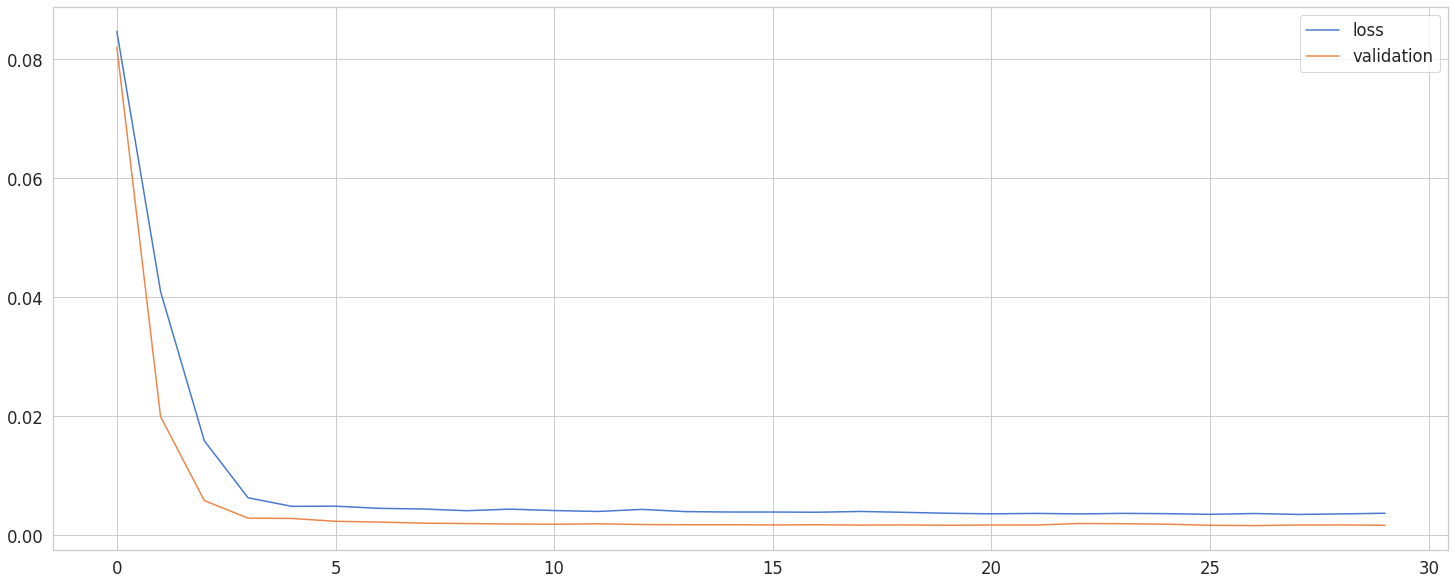

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
#DRAWING LOSS AND VALIDATION
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

In [12]:
#PREDICTION STARTED WITH TEST DATA
y_pred_test = model.predict(scaled_X_test)

#predicted TEST value inverted
y_pred_test_inv = scaler.inverse_transform(y_pred_test)
#real TEST value inverted
scaled_y_test_inv = scaler.inverse_transform(scaled_y_test)

print(y_pred_test_inv[50:70])
print(y_test[50:70])

[[   0.     ]
 [   0.     ]
 [   0.     ]
 [   0.     ]
 [   0.     ]
 [  80.24595]
 [ 228.05818]
 [ 226.50107]
 [ 286.9776 ]
 [ 469.51285]
 [ 659.47797]
 [ 848.1349 ]
 [ 836.9053 ]
 [ 698.0706 ]
 [1186.0197 ]
 [1727.028  ]
 [1821.6913 ]
 [1649.5917 ]
 [2293.7993 ]
 [2458.3093 ]]
Timestamp
2020-03-04 05:44:51       0.0
2020-03-04 05:58:54       0.0
2020-03-04 06:14:13       0.0
2020-03-04 06:29:32       0.0
2020-03-04 06:44:51       0.0
2020-03-04 06:59:46       0.0
2020-03-04 07:14:49     216.0
2020-03-04 07:29:52     211.0
2020-03-04 07:44:54     258.0
2020-03-04 07:59:57     354.0
2020-03-04 08:14:59     614.0
2020-03-04 08:28:58     858.0
2020-03-04 08:44:00     798.0
2020-03-04 08:59:03     702.0
2020-03-04 09:14:05    1209.0
2020-03-04 09:29:08    1803.0
2020-03-04 09:44:11    2042.0
2020-03-04 09:59:13    1664.0
2020-03-04 10:14:16    2320.0
2020-03-04 10:29:18    2373.0
Name: site8, dtype: float64


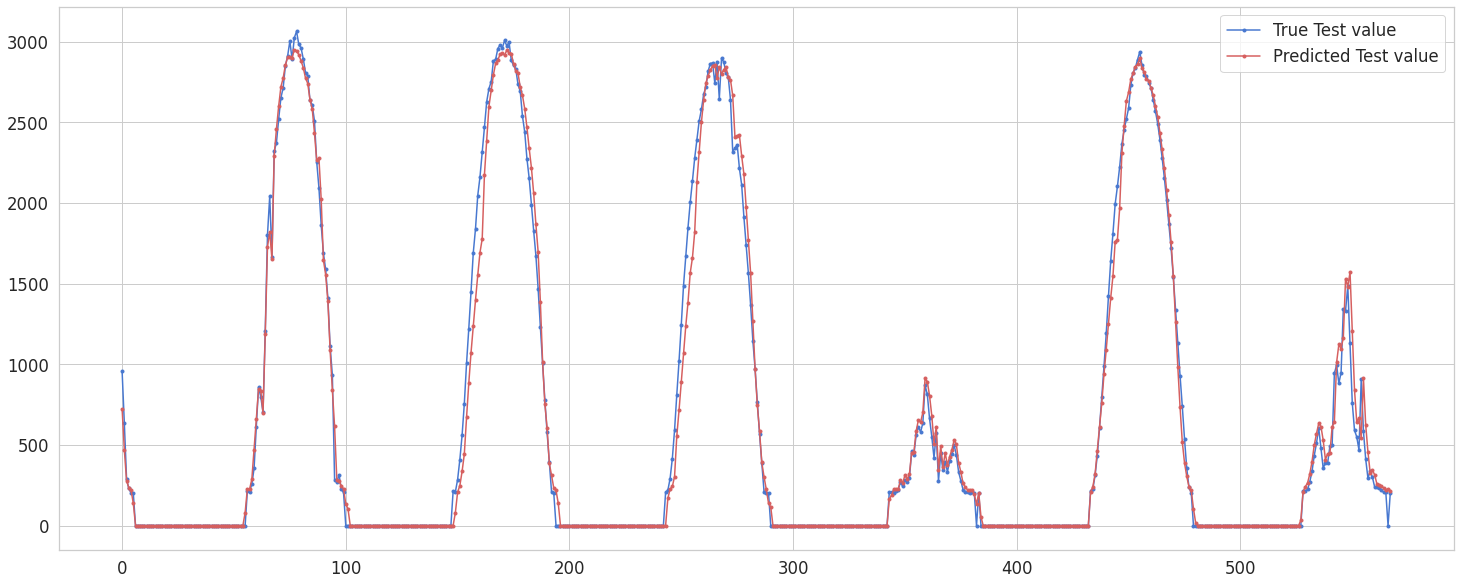

In [13]:
#DRAWING THE TRUE AND PREDICTED VALUES
import matplotlib.pyplot as plt
plt.plot(scaled_y_test_inv.flatten(), marker='.', label='True Test value')
plt.plot(y_pred_test_inv.flatten(), 'r', marker='.', label='Predicted Test value')
plt.legend()

In [14]:
# CREATE NEW TEST DATA
test_ = new_data.iloc[6000:6100,2:8]

X_test_, y_test_ = test_.iloc[:,:-1],test_.iloc[:,5]

scaled_test_ = scaler.fit_transform(X_test_)
scaled_test_ = scaled_test_.reshape(len(test_),1,5)

scaled_y = scaler.fit(y_test_.values.reshape(-1,1))
y_predicted = model.predict(scaled_test_)

inversed_y = scaler.inverse_transform(y_predicted.reshape(-1,1))
print(inversed_y)

[[   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [  87.09729 ]
 [  87.91782 ]
 [  87.563255]
 [ 170.3761  ]
 [ 228.73647 ]
 [ 230.77818 ]
 [ 252.45592 ]
 [ 548.3033  ]
 [ 684.1381  ]
 [ 925.74146 ]
 [1117.202   ]
 [1319.9651  ]
 [1510.4365  ]
 [1737.9283  ]
 [1886.6466  ]
 [2028.9641  ]
 [2185.5002  ]
 [2321.8845  ]
 [2435.6462  ]
 [2542.7224  ]
 [2666.775   ]
 [2779.4421  ]
 [2841.0205  ]
 [2870.7168  ]
 [2773.3223  ]
 [2544.7478  ]
 [3005.2788  ]
 [2216.551   ]
 [2961.3843  ]
 [2520.3286  ]
 [2175.7158  ]
 [2854.9368  ]
 [1942.5883  ]
 [2547.0505  ]
 [2308.2717  ]
 [2523.4138  ]
 [2282.7595  ]
 [1999.4729  ]
 [2248.6016  ]
 [1995.0582  ]
 [1940.39    ]
 [1714.1061  ]
 [1386.387   ]
 [1268.6632  ]
 [1017.092   ]
 [1016.7523  ]
 [ 888.2558  ]
 [ 758.6914  ]
 [ 615.60394 ]
 [ 509.2412  ]
 [ 305.85977 ]
 [ 230.78036 ]
 [ 171.668

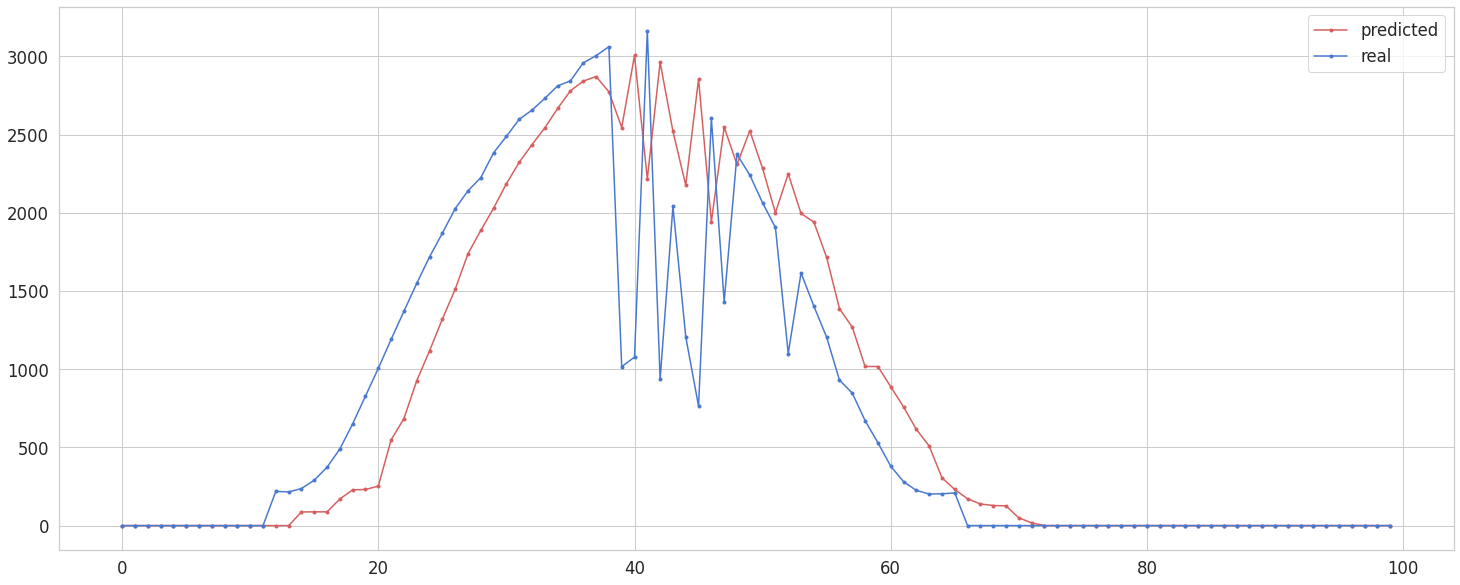

In [15]:
#DRAWING NEW TEST DATA RESULTS
plt.plot(inversed_y.flatten(),'r', marker='.', label='predicted')
plt.plot(y_test_.values,'b', marker='.', label='real')
plt.legend()